서울특별시 동대문구 (1123000000)    1932.497655
서울특별시 마포구 (1144000000)     2231.044897
서울특별시 동작구 (1159000000)     2278.091757
서울특별시 영등포구 (1156000000)    2294.171283
서울특별시 서대문구 (1141000000)    1724.706227
서울특별시 성동구 (1120000000)     1721.032049
서울특별시 중랑구 (1126000000)     2330.932967
서울특별시 구로구 (1153000000)     2273.330332
서울특별시 도봉구 (1132000000)     1823.884441
서울특별시 강북구 (1130500000)     1725.929108
서울특별시 성북구 (1129000000)     2399.345192
서울특별시 서초구 (1165000000)     2412.879827
서울특별시 금천구 (1154500000)     1431.113999
서울특별시 강동구 (1174000000)     2631.840822
서울특별시 용산구 (1117000000)     1315.428598
서울특별시 은평구 (1138000000)     2649.191993
서울특별시 양천구 (1147000000)     2616.314333
서울특별시 노원구 (1135000000)     2902.723577
서울특별시 관악구 (1162000000)     3540.376142
서울특별시 종로구 (1111000000)      836.910466
서울특별시 강남구 (1168000000)     3162.326665
서울특별시 중구 (1114000000)       725.642832
서울특별시 강서구 (1150000000)     3431.064203
서울특별시 송파구 (1171000000)     3900.477026
dtype: float64
Index(['2020년12월_계_0세', '2020년12월_계_1세', '2020년12

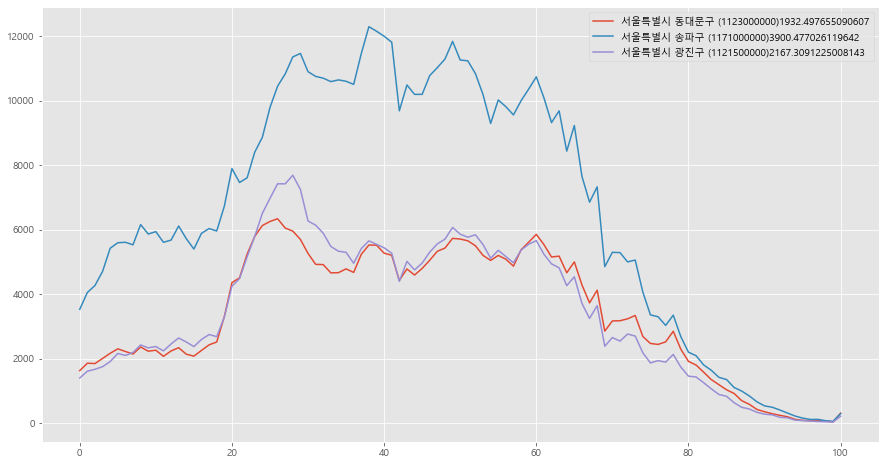

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

df=pd.read_csv("population.csv",encoding='utf-8',header=0,index_col=0)
df=df.astype(str)
df = df.applymap(lambda x: x.replace(',', ''))
df=df.astype(int)
del df[df.columns[1]]
del df[df.columns[0]]

i=0
index=-1
Barray=np.array(0)
while(True):
    try:

        if df.index[i].find("광진구")>0:
            Barray=pd.DataFrame(df[i:i+1])
            index=i
            break
        i=i+1
    except:
        break
i=1

diff=pd.DataFrame()


for i in range(1,len(df.index)):
    if df.index[i].find("광진구")<=0:
        temp_df=pd.DataFrame()
        temp_df=pd.concat([Barray,temp_df])
        temp_df=pd.concat([temp_df,pd.DataFrame(df[i:i+1])])

#         print(pd.DataFrame(np.sum(np.square(np.diff(temp_df,axis=0)),axis=1)))

#         print(pd.DataFrame(np.sum(np.square(np.diff(temp_df,axis=0)),axis=1)).values[0][0])
        total=pd.DataFrame(np.sum(np.square(np.diff(temp_df,axis=0)),axis=1)).values[0][0]
        index=np.array(df.index[i])
        temp_df=pd.DataFrame(df[i:i+1],index=index)

        temp_df["total"]=total
        diff=diff.append(temp_df)




diff=diff.sort_values(by=['total'], axis=0)
diff=diff.astype(int)


del diff["total"]
print(diff.std(axis=1))
print(Barray.columns)
Barray["std"]=Barray.std(axis= 1)
diff["std"]=diff.std(axis= 1)
different=diff.index[0]+str(diff["std"].values[0])
resemble=diff.index[len(diff)-1]+str(diff["std"].values[len(diff)-1])
same=Barray.index[0]+str(Barray["std"].values[0])
del diff["std"]
del Barray["std"]

plt.style.use('ggplot')
plt.figure(figsize=(15, 8))
plt.plot(diff[0:1].values[0],label=different)
plt.plot(diff[len(diff)-1:len(diff)].values[0],label=resemble)
plt.plot(Barray.values[0],label=same)

plt.legend()
plt.show()